#Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Install and import necessary libraries

In [ ]:
!pip install imantics --quiet

  Preparing metadata (setup.py) ... done


In [ ]:
import os
import cv2
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import imantics
from PIL import Image
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import shutil
from zipfile import ZipFile
import os


In [ ]:
# Path to the zipped dataset file
zipped_dataset_path = '/content/drive/MyDrive/dataset.zip'

# Update the destination directory for extraction
local_extracted_dir = '/content/extracted_images'

# Create the local extraction directory if it doesn't exist
os.makedirs(local_extracted_dir, exist_ok=True)

# Extract the zipped dataset
with ZipFile(zipped_dataset_path, 'r') as zip_ref:
    zip_ref.extractall(local_extracted_dir)

# Move the extracted content to the local directory
local_images_dir = os.path.join(local_extracted_dir, 'frames')
local_masks_dir = os.path.join(local_extracted_dir, 'masks')


# Move the extracted folders to the local directory
os.makedirs(local_images_dir, exist_ok=True)
os.makedirs(local_masks_dir, exist_ok=True)

# Move images
for file in os.listdir(local_images_dir):
    src = os.path.join(local_images_dir, file)
    dst = os.path.join(local_images_dir, file)
    shutil.move(src, dst)

# Move masks
for file in os.listdir(local_masks_dir):
    src = os.path.join(local_masks_dir, file)
    dst = os.path.join(local_masks_dir, file)
    shutil.move(src, dst)

# Count the number of images in local_images_dir
num_images = len(os.listdir(local_images_dir))

# Count the number of images in local_masks_dir
num_masks = len(os.listdir(local_masks_dir))

# Display the counts
print("Number of Images in frames directory:", num_images)
print("Number of Images in masks directory:", num_masks)


Number of Images in frames directory: 2729
Number of Images in masks directory: 2729


In [ ]:
images_dir = os.path.join(local_extracted_dir, 'frames')
masks_dir = os.path.join(local_extracted_dir, 'masks')


Frames Images:

Masks Images:


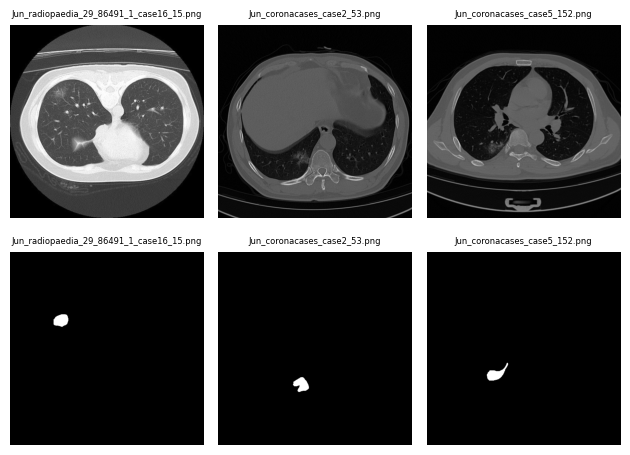

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Function to display images
def display_images(directory, folder_name, num_images=3):
    print(f"\n{folder_name} Images:")
    for i, file in enumerate(os.listdir(directory)[:num_images]):
        img_path = os.path.join(directory, file)
        img = mpimg.imread(img_path)


        # Display image with smaller text
        plt.subplot(2, num_images, i + 1 + (num_images * (folder_name == 'Masks')))
        plt.imshow(img)
        plt.axis('off')
        plt.title(file, fontsize=6)  # Adjust fontsize as needed

# Display first 3 images from 'frames' directory
display_images(local_images_dir, 'Frames', num_images=3)

# Display first 3 images from 'masks' directory
display_images(local_masks_dir, 'Masks', num_images=3)

# Adjust layout for better display
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
def read_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, input_image_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


# Display the header of the DataFrame
print("Dataset Header:")
print(tile_df.head())

# Display information about the number of images
print("\nNumber of Images in Skin Lesions Dataset:")
print("Total Images:", number)
print("Number of Images Loaded:", len(os.listdir(images_dir)))


In [ ]:
!pip install imantics --quiet

In [ ]:
import os
import cv2
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import imantics
from PIL import Image
from skimage.transform import resize
from sklearn.model_selection import train_test_split
%matplotlib inline

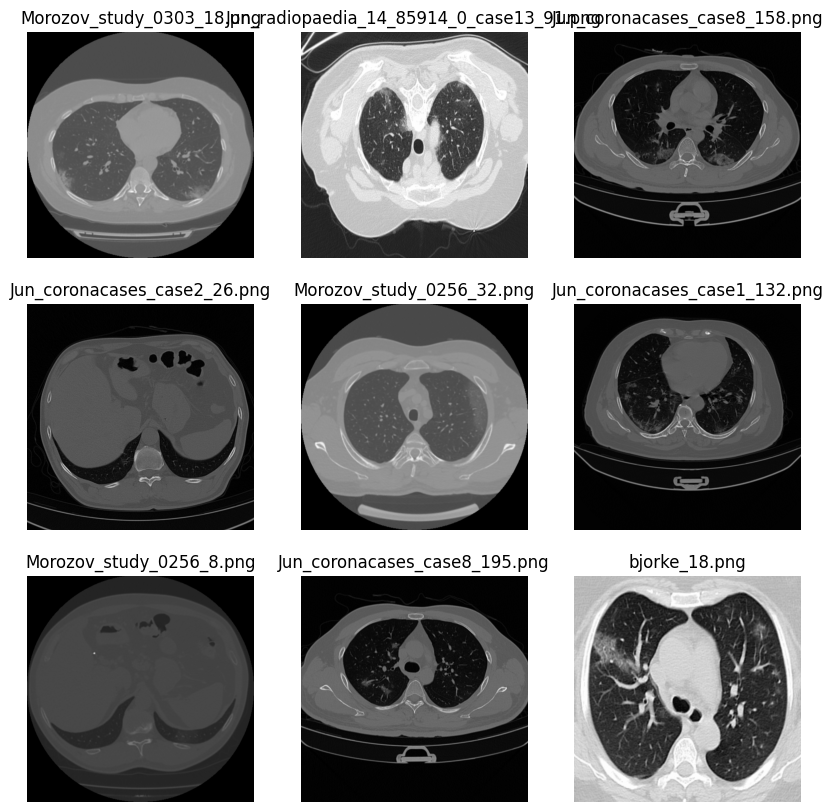

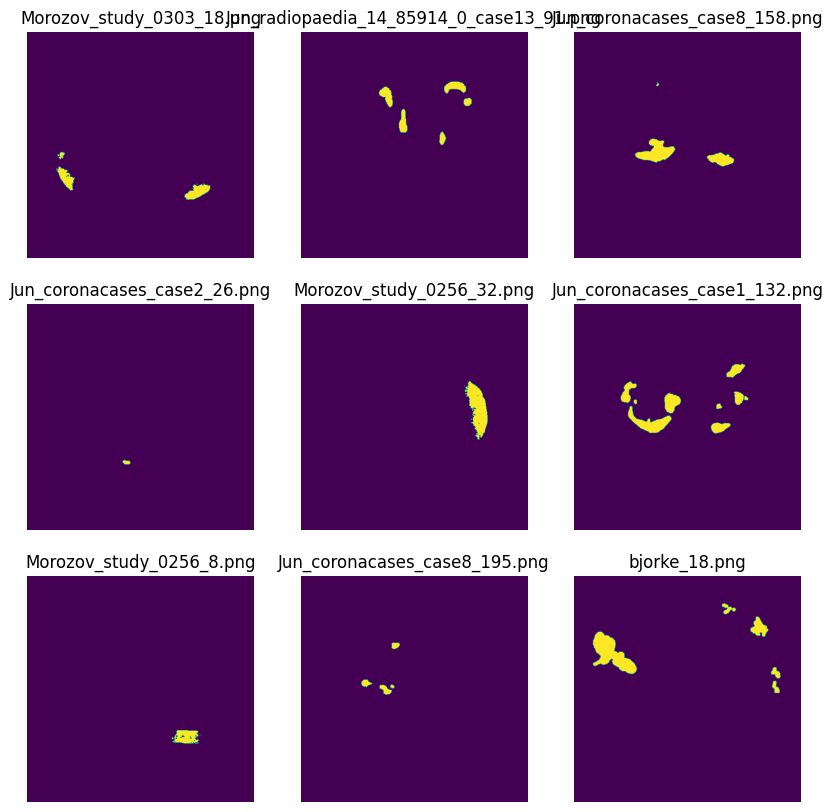

In [ ]:
images_listdir = os.listdir(local_images_dir)
random_images = np.random.choice(images_listdir, size = 9, replace = False)
rows = 3
cols = 3
image_size=512
input_image_size=(512,512)
fig, ax = plt.subplots(rows, cols, figsize = (10,10))
for i, ax in enumerate(ax.flat):
    if i < len(random_images):
        img = read_image(f"{local_images_dir}/{random_images[i]}")
        ax.set_title(f"{random_images[i]}")
        ax.imshow(img)
        ax.axis('off')

fig, ax = plt.subplots(rows, cols, figsize = (10,10))
for i, ax in enumerate(ax.flat):
    if i < len(random_images):
        file=random_images[i]
        if os.path.exists(os.path.join(local_masks_dir,file)):
            img = read_image(f"{local_masks_dir}/{file}")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            ax.set_title(f"{random_images[i]}")
            ax.imshow(img)
            ax.axis('off')
        else:
            print('not exist')

In [ ]:
number=100
MASKS=np.zeros((number,image_size, image_size, 1), dtype=bool)
IMAGES=np.zeros((number,image_size, image_size, 3),dtype=np.uint8)

for j,file in enumerate(images_listdir[0:number]):   ##the smaller, the faster
    try:
        image = read_image(f"{images_dir}/{file}")
        image_ex = np.expand_dims(image, axis=0)
        IMAGES = np.vstack([IMAGES, image_ex])
        mask = read_image(f"{masks_dir}/{file}")
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        mask = mask.reshape(512,512,1)
        mask_ex = np.expand_dims(mask, axis=0)
        MASKS = np.vstack([MASKS, mask_ex])
    except:
        print(file)
        continue

In [ ]:
images=np.array(IMAGES)[1:number+1]
masks=np.array(MASKS)[1:number+1]
print(images.shape,masks.shape)

(40, 512, 512, 3) (40, 512, 512, 1)


In [ ]:
images_train, images_test, masks_train, masks_test = train_test_split(
    images, masks, test_size=0.2, random_state=42)
print(len(images_train), len(masks_train))

32 32


In [ ]:
def conv_block(input, num_filters):
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(input)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(conv)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    return conv

def encoder_block(input, num_filters):
    skip = conv_block(input, num_filters)
    pool = tf.keras.layers.MaxPool2D((2,2))(skip)
    return skip, pool

def decoder_block(input, skip, num_filters):
    up_conv = tf.keras.layers.Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(input)
    conv = tf.keras.layers.Concatenate()([up_conv, skip])
    conv = conv_block(conv, num_filters)
    return conv

def Unet(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    skip1, pool1 = encoder_block(inputs, 64)
    skip2, pool2 = encoder_block(pool1, 128)
    skip3, pool3 = encoder_block(pool2, 256)
    skip4, pool4 = encoder_block(pool3, 512)

    bridge = conv_block(pool4, 1024)

    decode1 = decoder_block(bridge, skip4, 512)
    decode2 = decoder_block(decode1, skip3, 256)
    decode3 = decoder_block(decode2, skip2, 128)
    decode4 = decoder_block(decode3, skip1, 64)
    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation="sigmoid")(decode4)
    model = tf.keras.models.Model(inputs, outputs, name="U-Net")
    return model

unet_model = Unet((512,512,3))
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
unet_model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 512, 512, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 512, 512, 64)         0         ['batch_normalization[0][0

In [ ]:
unet_result = unet_model.fit(
    images_train, masks_train,
    validation_split = 0.2, batch_size = 4, epochs = 10)

Epoch 1/10
7/7 [==============================] - 825s 113s/step - loss: 0.6755 - accuracy: 0.7634 - val_loss: 0.6662 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 793s 113s/step - loss: 0.3675 - accuracy: 0.9836 - val_loss: 0.3404 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 810s 116s/step - loss: 0.2290 - accuracy: 0.9721 - val_loss: 1.6661e-04 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 818s 116s/step - loss: 0.2143 - accuracy: 0.9767 - val_loss: 4.8384e-04 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 809s 115s/step - loss: 0.0363 - accuracy: 0.9728 - val_loss: 8.5932e-04 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 804s 115s/step - loss: 0.0434 - accuracy: 0.9786 - val_loss: 5.3387e-05 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 818s 116s/step - loss: 0.0188 - accuracy: 0.9695 - val_loss: 2.9477e-06 - val_accuracy: 

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = unet_model.evaluate(images_test, masks_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

1/1 [==============================] - 70s 70s/step - loss: 3.1072e-04 - accuracy: 1.0000
Test Loss: 0.000310721603455022
Test Accuracy: 0.9999542236328125


In [ ]:
import tensorflow as tf

def conv_block(input, num_filters):
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(input)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(conv)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    return conv

def encoder_block(input, num_filters):
    skip = conv_block(input, num_filters)
    pool = tf.keras.layers.MaxPool2D((2,2))(skip)
    return skip, pool

def decoder_block(input, skip, num_filters):
    up_conv = tf.keras.layers.Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(input)
    conv = tf.keras.layers.Concatenate()([up_conv, skip])
    conv = conv_block(conv, num_filters)
    return conv

def FCN(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    skip1, pool1 = encoder_block(inputs, 64)
    skip2, pool2 = encoder_block(pool1, 128)
    skip3, pool3 = encoder_block(pool2, 256)
    skip4, pool4 = encoder_block(pool3, 512)

    bridge = conv_block(pool4, 1024)

    decode1 = decoder_block(bridge, skip4, 512)
    decode2 = decoder_block(decode1, skip3, 256)
    decode3 = decoder_block(decode2, skip2, 128)
    decode4 = decoder_block(decode3, skip1, 64)

    # Replace the dense layer with a convolutional layer
    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation="sigmoid")(decode4)

    model = tf.keras.models.Model(inputs, outputs, name="FCN")
    return model

fcn_model = FCN((512, 512, 3))
fcn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
fcn_model.summary()


Model: "FCN"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 512, 512, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_18 (Ba  (None, 512, 512, 64)         256       ['conv2d_19[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_18 (Activation)  (None, 512, 512, 64)         0         ['batch_normalization_18[0][

In [ ]:
# Train the FCN model
history = fcn_model.fit(
    images_train, masks_train,
    validation_split = 0.2, batch_size = 4, epochs = 10)


Epoch 1/10
7/7 [==============================] - 817s 115s/step - loss: 0.7413 - accuracy: 0.8189 - val_loss: 0.6737 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 805s 115s/step - loss: 0.3591 - accuracy: 0.9369 - val_loss: 0.6152 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 804s 114s/step - loss: 0.1152 - accuracy: 0.9657 - val_loss: 0.5254 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 801s 115s/step - loss: -0.0128 - accuracy: 0.9673 - val_loss: 0.3483 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 803s 115s/step - loss: 0.0458 - accuracy: 0.9671 - val_loss: 1.5203e-05 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 802s 114s/step - loss: -0.0866 - accuracy: 0.9761 - val_loss: 5.2196e-06 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 803s 115s/step - loss: -0.2099 - accuracy: 0.9700 - val_loss: 4.1370e-06 - val_accuracy: 1.000

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = fcn_model.evaluate(images_test, masks_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

1/1 [==============================] - 64s 64s/step - loss: 0.0039 - accuracy: 1.0000
Test Loss: 0.0038913090247660875
Test Accuracy: 1.0


In [ ]:
import tensorflow as tf

def conv_block(input, num_filters, dilation_rate=1):
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same", dilation_rate=dilation_rate)(input)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.ReLU()(conv)
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same", dilation_rate=dilation_rate)(conv)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.ReLU()(conv)
    return conv

def encoder_block(input, num_filters, dilation_rate=1):
    conv = conv_block(input, num_filters, dilation_rate=dilation_rate)
    pool = tf.keras.layers.MaxPool2D((2,2))(conv)
    return conv, pool

def DeepLabV1(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    skip1, pool1 = encoder_block(inputs, 64)
    skip2, pool2 = encoder_block(pool1, 128)
    skip3, pool3 = encoder_block(pool2, 256, dilation_rate=2)
    skip4, pool4 = encoder_block(pool3, 512, dilation_rate=4)

    bridge = conv_block(pool4, 1024, dilation_rate=8)

    decode1 = tf.keras.layers.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding="same")(bridge)
    decode1 = tf.keras.layers.Concatenate()([decode1, skip4])
    decode1 = conv_block(decode1, 512)

    decode2 = tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding="same")(decode1)
    decode2 = tf.keras.layers.Concatenate()([decode2, skip3])
    decode2 = conv_block(decode2, 256)

    decode3 = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding="same")(decode2)
    decode3 = tf.keras.layers.Concatenate()([decode3, skip2])
    decode3 = conv_block(decode3, 128)

    decode4 = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding="same")(decode3)
    decode4 = tf.keras.layers.Concatenate()([decode4, skip1])
    decode4 = conv_block(decode4, 64)

    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation="sigmoid")(decode4)

    model = tf.keras.models.Model(inputs, outputs, name="DeepLabV1")
    return model

# Data augmentation and preprocessing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Compile the model with custom optimizer, loss, and metrics
deeplab_model = DeepLabV1((512, 512, 3))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
deeplab_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=2)])

# Train the model
train_generator = train_datagen.flow(train_images, train_masks, batch_size=batch_size)
val_generator = val_datagen.flow(val_images, val_masks, batch_size=batch_size)

history = deeplab_model.fit(train_generator, epochs=num_epochs, validation_data=val_generator)

# Evaluate the model
test_generator = test_datagen.flow(test_images, test_masks, batch_size=batch_size)
evaluation = deeplab_model.evaluate(test_generator)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])
print("Test Mean IoU:", evaluation[2])


Model: "DeepLabV1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d_38 (Conv2D)          (None, 512, 512, 64)         1792      ['input_3[0][0]']             
                                                                                                  
 batch_normalization_36 (Ba  (None, 512, 512, 64)         256       ['conv2d_38[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_36 (Activation)  (None, 512, 512, 64)         0         ['batch_normalization_

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('deeplabv1_model.h5', save_best_only=True)
history = deeplab_model.fit( images_train, masks_train, batch_size=16, epochs=20, validation_split=0.2, callbacks=[checkpoint])

In [ ]:
import tensorflow as tf

def conv_block(input, num_filters, dilation_rate=1):
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same", dilation_rate=dilation_rate)(input)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same", dilation_rate=dilation_rate)(conv)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    return conv

def encoder_block(input, num_filters, dilation_rate=1):
    conv = conv_block(input, num_filters, dilation_rate=dilation_rate)
    pool = tf.keras.layers.MaxPool2D((2,2))(conv)
    return conv, pool

def FastRCNN(input_shape, num_classes):
    inputs = tf.keras.layers.Input(input_shape)

    skip1, pool1 = encoder_block(inputs, 64)
    skip2, pool2 = encoder_block(pool1, 128)
    skip3, pool3 = encoder_block(pool2, 256, dilation_rate=2)
    skip4, pool4 = encoder_block(pool3, 512, dilation_rate=4)

    rpn_conv = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    rpn_cls = tf.keras.layers.Conv2D(18, (1, 1), activation='softmax', name='rpn_cls')(rpn_conv)
    rpn_reg = tf.keras.layers.Conv2D(36, (1, 1), activation='linear', name='rpn_reg')(rpn_conv)

    roi_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(pool4)

    flatten = tf.keras.layers.Flatten()(roi_pool)
    fc1 = tf.keras.layers.Dense(4096, activation='relu')(flatten)
    fc2 = tf.keras.layers.Dense(4096, activation='relu')(fc1)

    cls_output = tf.keras.layers.Dense(num_classes, activation='softmax', name='cls_output')(fc2)
    reg_output = tf.keras.layers.Dense(num_classes * 4, activation='linear', name='reg_output')(fc2)

    model = tf.keras.models.Model(inputs=inputs, outputs=[rpn_cls, rpn_reg, cls_output, reg_output], name="FastRCNN")
    return model

fast_rcnn_model = FastRCNN((512, 512, 3), num_classes=10) \\

fast_rcnn_model.summary()


In [ ]:
fast_rcnn_model.compile(optimizer='adam',
                        loss={'rpn_cls': 'sparse_categorical_crossentropy',
                              'rpn_reg': 'smooth_l1',
                              'cls_output': 'sparse_categorical_crossentropy',
                              'reg_output': 'smooth_l1'},
                        loss_weights={'rpn_cls': 1.0,
                                      'rpn_reg': 1.0,
                                      'cls_output': 1.0,
                                      'reg_output': 1.0})

Performance Metrics for RCNN

In [ ]:
import tensorflow.keras.backend as K

# Define custom metrics
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision_val = precision(y_true, y_pred)
    recall_val = recall(y_true, y_pred)
    return 2 * ((precision_val * recall_val) / (precision_val + recall_val + K.epsilon()))

# Compile the model with custom metrics
fast_rcnn_model.compile(optimizer='adam',
                        loss={'rpn_cls': 'sparse_categorical_crossentropy',
                              'rpn_reg': 'smooth_l1',
                              'cls_output': 'sparse_categorical_crossentropy',
                              'reg_output': 'smooth_l1'},
                        loss_weights={'rpn_cls': 1.0,
                                      'rpn_reg': 1.0,
                                      'cls_output': 1.0,
                                      'reg_output': 1.0},
                        metrics={'rpn_cls': ['accuracy', f1_score, recall, precision],
                                 'cls_output': ['accuracy', f1_score, recall, precision]})

# Train the model
history = fast_rcnn_model.fit(train_images, [train_rpn_cls_labels, train_rpn_reg_labels, train_cls_labels, train_reg_labels],
                              validation_data=(val_images, [val_rpn_cls_labels, val_rpn_reg_labels, val_cls_labels, val_reg_labels]),
                              epochs=num_epochs, batch_size=batch_size)

# Evaluate the model
evaluation = fast_rcnn_model.evaluate(test_images, [test_rpn_cls_labels, test_rpn_reg_labels, test_cls_labels, test_reg_labels])
print("Test Loss:", evaluation[0])
print("RPN Classification Accuracy:", evaluation[1])

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for each epoch
accuracy_values = [0.7634, 0.9836 , 0.9721 ,0.9767 ,0.9728, 0.9786 , 0.9695,0.9753 ,0.9760 ,0.9781  ]
loss_values = [0.6755 ,0.3675 ,0.2290 ,0.2143 ,0.0363 ,0.0434 , 0.0188, -0.0854 , -0.2973,-0.8116   ]
vall_loss = [0.6662 ,0.3404 ,1.6661e-04, 4.8384e-04,8.5932e-04,5.3387e-05,2.9477e-06,3.8178e-06,8.8296e-06,3.1072e-04]
# Number of epochs
epochs = range(1, len(accuracy_values) + 1)

# Plotting accuracy by epoch number
plt.plot(epochs, accuracy_values, marker='o', linestyle='-')
# plt.plot(epochs, loss_values, marker='o', linestyle='-')
# plt.plot(epochs, vall_loss, marker='o', linestyle='-')
plt.title('Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for each epoch
accuracy_values = [0.8189 ,0.9369 ,0.9657 ,0.9673 ,0.9671 ,0.9761 ,0.9700 ,0.9826 ,0.9593 ,0.9726  ]
loss_values = [0.7413 ,0.3591,0.1152 ,-0.0128 ,0.0458 ,-0.0866 ,-0.2099 ,-0.3940 ,0.1895 ,-0.4411 ]
vall_loss = [0.6737 , 0.6152,   0.5254, 0.3483, -1.5203e-05 , 5.2196e-06 , 4.1370e-06 , 0.0013,  0.0114 , 0.0039 ]
# Number of epochs
epochs = range(1, len(accuracy_values) + 1)

# Plotting accuracy by epoch number
# plt.plot(epochs, accuracy_values, marker='o', linestyle='-')
plt.plot(epochs, loss_values, marker='o', linestyle='-')
plt.plot(epochs, vall_loss, marker='o', linestyle='-')
plt.title('Loss and val_loss by Epoch')
plt.xlabel('Loss and val_loss')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.grid(True)
plt.show()